In [4]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [6]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [7]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  us-accidents.zip
replace US_Accidents_Dec20_Updated.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/US_Accidents_Dec20_Updated.csv')

In [11]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
df.shape

(2906610, 47)

In [13]:
##### Checking Duplicate Columns


df_duplicate = df[df.duplicated()]
df_duplicate

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [14]:
df_duplicate = df[df.duplicated()]
df_duplicate.count()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [15]:
### Finding Categorical Variables


cat = [cat for cat in df.columns if df[cat].dtypes == "O"]
print(len(cat))
cat

20


['ID',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [16]:
### Finding Boolean Types


num = [num for num in df.columns if df[num].dtypes =="bool"]
print(len(num))
num

13


['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

In [17]:
### Finding Numerical Variables


num = [num for num in df.columns if df[num].dtypes !="bool" and df[num].dtypes!='O']
print(len(num))
num

14


['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [106]:
### is there some null values

df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)                 0
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [21]:
### How many missing values are there in each column

missing_per = df.isnull().sum().sort_values(ascending=False)
missing_per

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [22]:
### Missing percentages of values

missing_per = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_per

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

Text(0.5, 1.0, 'Missing values')

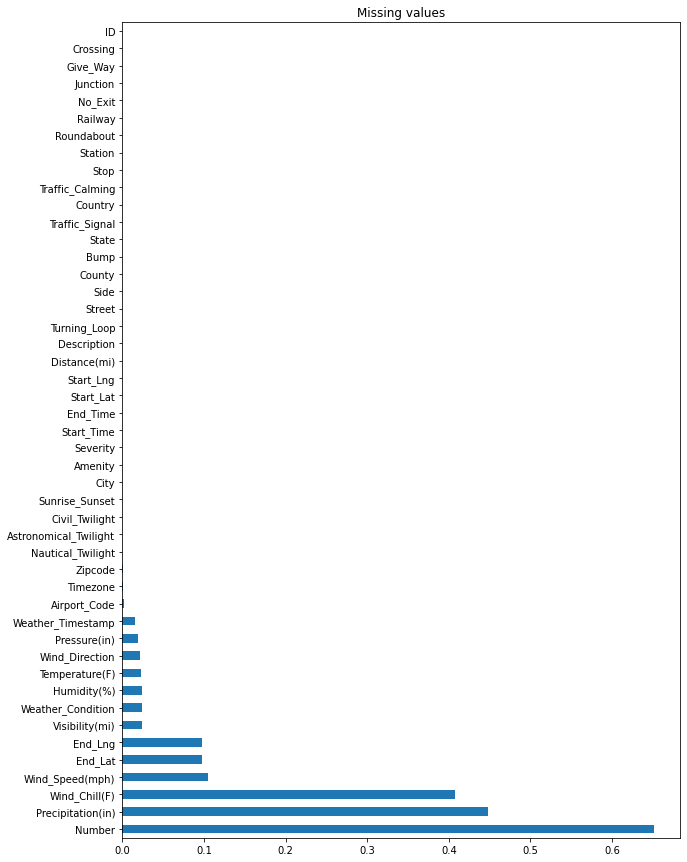

In [23]:
plt.figure(figsize=(10,15))
missing_per.plot(kind='barh')
plt.title('Missing values')

In [24]:
missing_per[missing_per!=0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

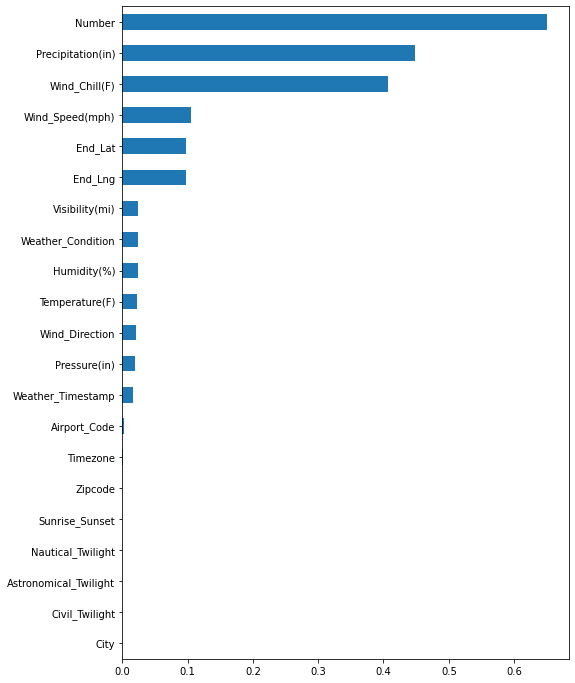

In [25]:
plt.figure(figsize=(8,12))
missing_per[missing_per!=0].sort_values(ascending=True).plot(kind="barh")

In [28]:
## Analyse CITY

len(df.City.unique())

11790

In [29]:
df.City.value_counts()

Los Angeles               68411
Houston                   68265
Charlotte                 56176
Miami                     49965
Dallas                    48525
                          ...  
City Of Spokane Valley        1
Marvell                       1
Throop                        1
Melvin                        1
Underhill                     1
Name: City, Length: 11789, dtype: int64

In [30]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Los Angeles               68411
Houston                   68265
Charlotte                 56176
Miami                     49965
Dallas                    48525
                          ...  
City Of Spokane Valley        1
Marvell                       1
Throop                        1
Melvin                        1
Underhill                     1
Name: City, Length: 11789, dtype: int64

In [31]:
cities_by_accidents[cities_by_accidents<100].count()

9016

In [32]:
#### Top 100 Cities with Number of accidents

pd.set_option("display.max_rows",None)
cities_by_accidents[:100]


Los Angeles         68411
Houston             68265
Charlotte           56176
Miami               49965
Dallas              48525
Austin              38808
Raleigh             31355
Atlanta             29244
Sacramento          28984
Orlando             28092
Nashville           25277
Baton Rouge         25080
Minneapolis         22469
San Diego           22329
Phoenix             21370
Oklahoma City       21292
Portland            19432
Richmond            18343
Seattle             17384
Saint Paul          17266
San Jose            16744
Chicago             16571
Jacksonville        16210
San Antonio         15751
Denver              14272
Indianapolis        13671
Tucson              13526
Columbia            13326
Greenville          12925
Riverside           12359
Oakland             12170
Tampa               11758
Rochester           11715
Detroit             10909
Fort Lauderdale     10764
Kansas City         10636
Omaha               10568
Salt Lake City      10532
Dayton      

In [33]:
#### Is NEW YOUR present there

if "New York" in cities_by_accidents:
  print("New York:",cities_by_accidents["New York"])

New York: 7328


In [107]:
df[df.City == "New York"].head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
509,A-510,3,2020-05-01 13:07:45,2020-05-01 13:47:44,40.808420,-73.944930,40.808420,-73.944930,0.000,At 129th St - Accident.,NaN,W 126th St,R,New York,New York,NY,10027,US,US/Eastern,KNYC,2020-05-01 13:12:00,1,60.0,86.0,29.59,10.0,WNW,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1110,A-1111,2,2016-12-22 19:42:40,2016-12-23 01:42:40,40.846940,-73.933650,40.846280,-73.932240,0.087,At Amsterdam Ave/Harlem River Dr - Accident.,271.0,Audubon Ave,R,New York,New York,NY,10033-6328,US,US/Eastern,KNYC,2016-12-22 19:51:00,1,34.7,53.0,30.09,10.0,WNW,10.4,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,True,False,Night,Night,Night,Night
1230,A-1231,2,2020-10-30 02:09:09,2020-10-30 04:18:02,40.760682,-73.963769,40.750662,-73.940519,1.400,Crash on Queensboro Bridge eastbound between M...,NaN,Ed Koch Queensboro Brg E,R,New York,New York,NY,10022,US,US/Eastern,KNYC,2020-10-30 01:59:00,1,42.0,93.0,29.56,5.0,NNE,8.0,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1448,A-1449,4,2017-11-03 07:21:27,2017-11-03 13:21:27,40.850020,-73.943990,40.853290,-73.960640,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,NaN,George Washington Brg,R,New York,New York,NY,10033,US,US/Eastern,KNYC,2017-11-03 06:51:00,1,NaN,80.0,30.07,10.0,Variable,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day
1482,A-1483,4,2017-12-10 17:34:53,2017-12-10 23:34:53,40.850020,-73.943990,40.853290,-73.960640,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,NaN,George Washington Brg,R,New York,New York,NY,10033,US,US/Eastern,KNYC,2017-12-10 17:51:00,1,31.6,52.0,29.98,10.0,Variable,6.9,NaN,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day


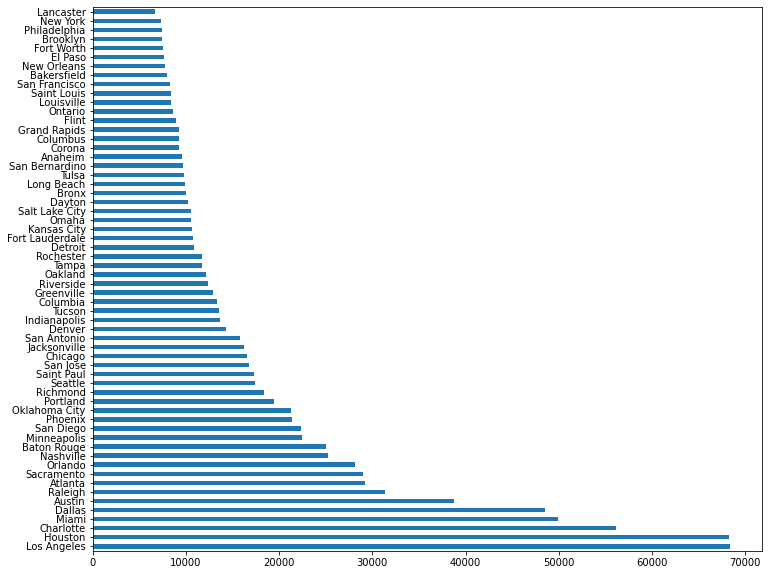

In [36]:
plt.figure(figsize=(12,10))
cities_by_accidents[:60].plot(kind="barh")

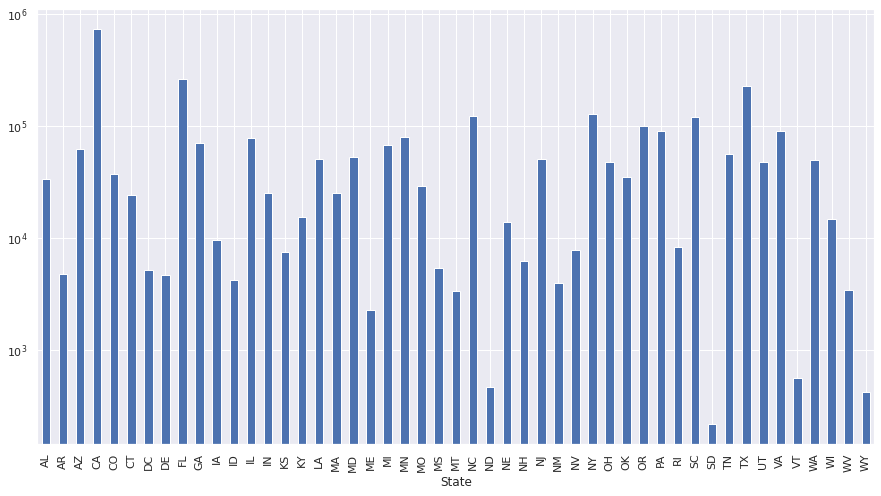

In [60]:
#### How many States have what number of accidents


plt.figure(figsize=(15,8))
df.groupby("State")["City"].count().plot(kind="bar")
plt.yscale("log")

In [38]:
### Highest and lowest accidents 


high_accident = cities_by_accidents[cities_by_accidents>=1000]
low_accident = cities_by_accidents[cities_by_accidents<1000]

In [111]:
print("Cities with more than 1000 accidents:",len(high_accident))
print("Percentage > 1000:",len(high_accident)/len(cities_by_accidents))
print("Cities with less than 1000 accidents:",len(low_accident))
print("Percentage < 1000:",len(low_accident)/len(cities_by_accidents))

Cities with more than 1000 accidents: 513
Percentage > 1000: 0.04351514123335313
Cities with less than 1000 accidents: 11276
Percentage < 1000: 0.9564848587666469


Text(0.5, 1.0, 'Number of Cities with highest accidents')

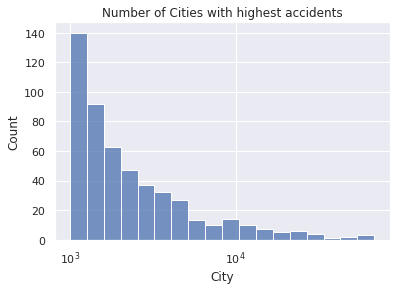

In [115]:
sns.histplot(high_accident,log_scale=True)
plt.title('Number of Cities with highest accidents')

Text(0.5, 1.0, 'Number of Cities with lower accidents')

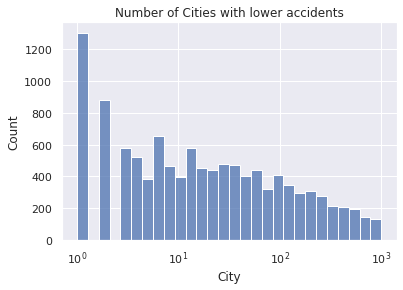

In [116]:
sns.histplot(low_accident,log_scale=True)
plt.title("Number of Cities with lower accidents")

In [42]:
## Time conversion to Timestamp

df.Start_Time[0]
type(df.Start_Time[0])

str

In [43]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [44]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [45]:
sns.set_theme()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


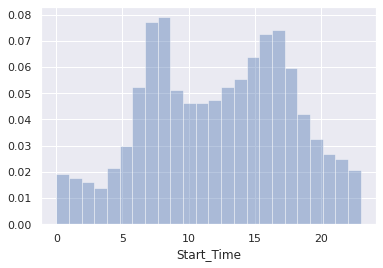

In [46]:
### Number of accidents in hours 

sns.distplot (df.Start_Time.dt.hour,bins=24,norm_hist=True,kde=False,hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


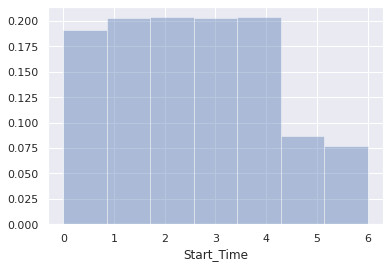

In [47]:
#### Number of accidents in weeks

sns.distplot (df.Start_Time.dt.dayofweek,bins=7,norm_hist=True,kde=False,hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


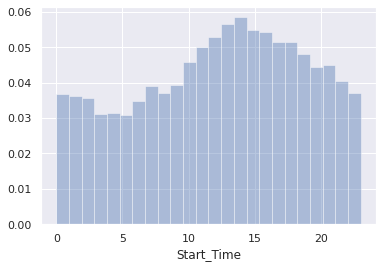

In [122]:
#### Number of accidents on Sunday


sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday.dt.hour,bins=24,norm_hist=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


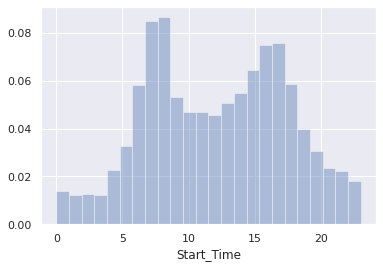

In [49]:
### Number of accidents on Monday


monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday.dt.hour,bins=24,norm_hist=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


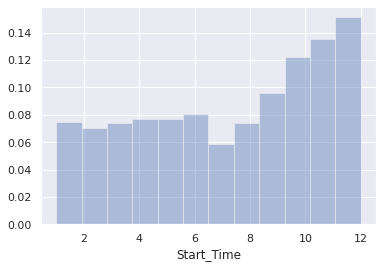

In [50]:
#### Number of accidents in months

sns.distplot(df.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

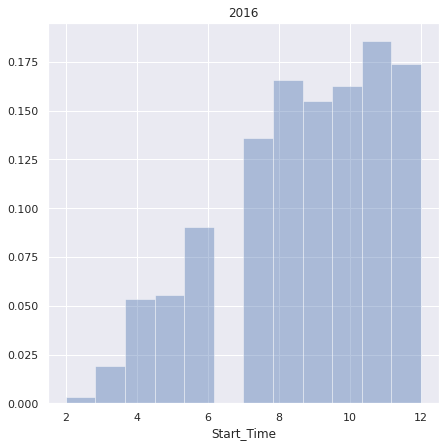

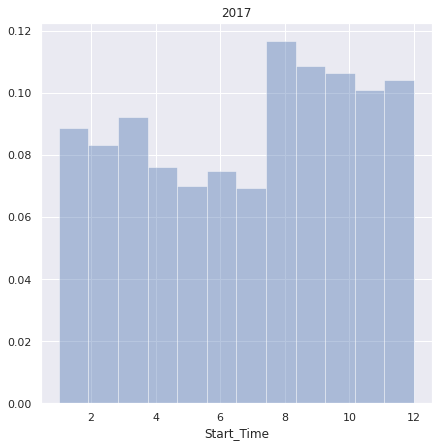

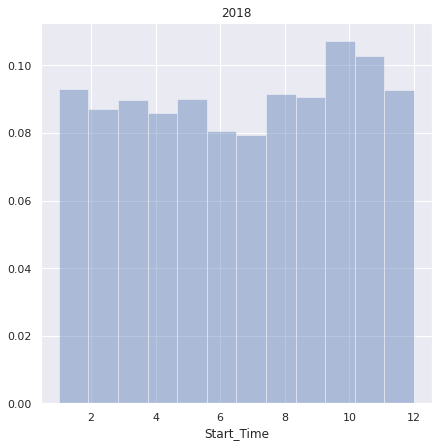

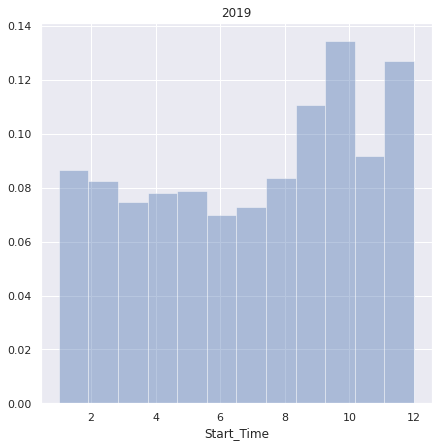

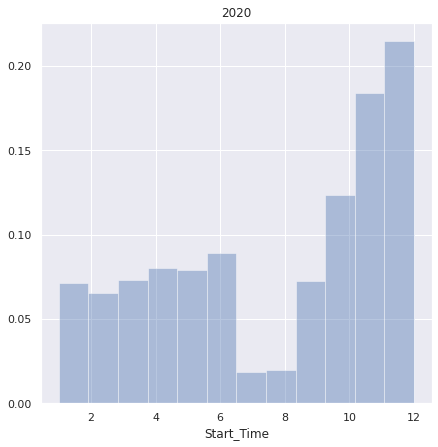

In [52]:
#### Number of accidents in each year


for year in [2016,2017,2018,2019,2020]:
  year_wise = df[df.Start_Time.dt.year == year]
  plt.figure(figsize=(7,7))
  sns.distplot(year_wise.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)
  plt.title(year)

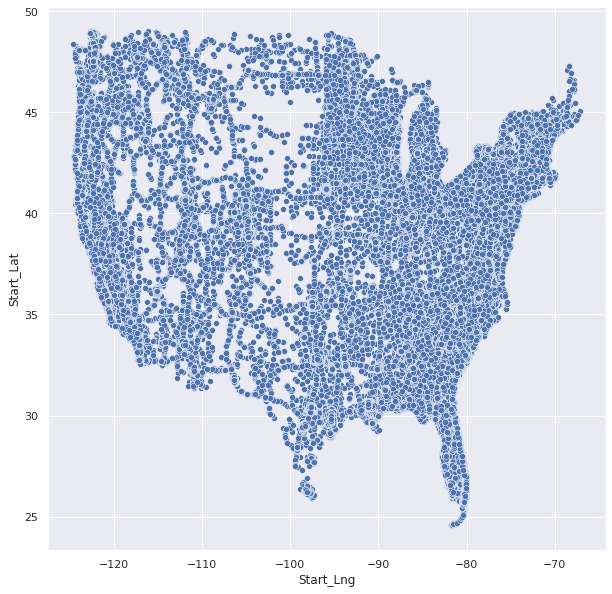

In [53]:
#### which area is much more prone to accidents 

plt.figure(figsize=(10,10))
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

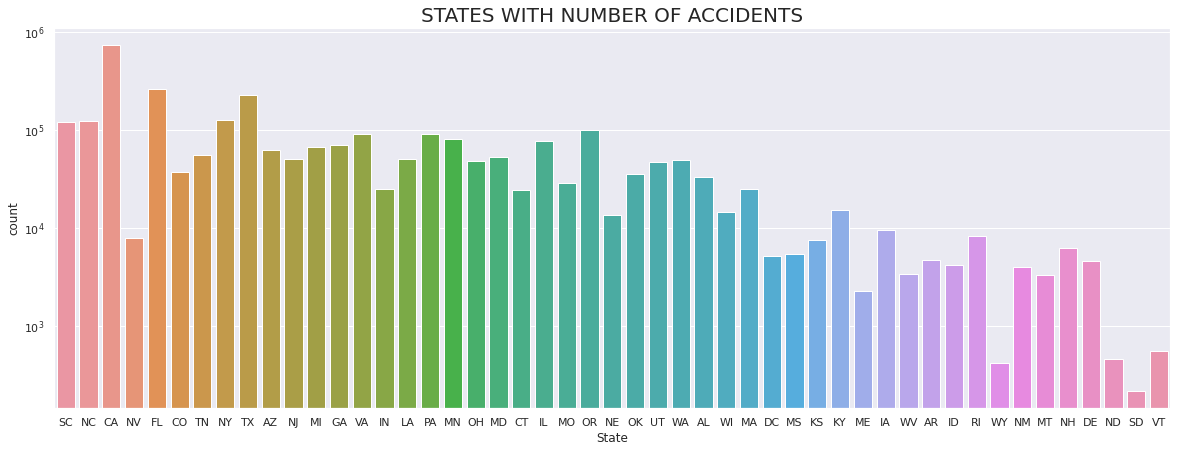

In [59]:
plt.figure(figsize=(20,7))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

In [65]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]
top_cities

,city,number_of_accidents
0,Saint Paul,17266
1,Seattle,17384
2,Richmond,18343
3,Portland,19432
4,Oklahoma City,21292
5,Phoenix,21370
6,San Diego,22329
7,Minneapolis,22469
8,Baton Rouge,25080
9,Nashville,25277


In [76]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]
top_cities["prob_acc"] = top_cities["number_of_accidents"]/sum(top_cities["number_of_accidents"])

In [81]:
top_cities


,city,number_of_accidents,prob_acc
0,Saint Paul,17266,0.026237
1,Seattle,17384,0.026417
2,Richmond,18343,0.027874
3,Portland,19432,0.029529
4,Oklahoma City,21292,0.032355
5,Phoenix,21370,0.032474
6,San Diego,22329,0.033931
7,Minneapolis,22469,0.034144
8,Baton Rouge,25080,0.038112
9,Nashville,25277,0.038411


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

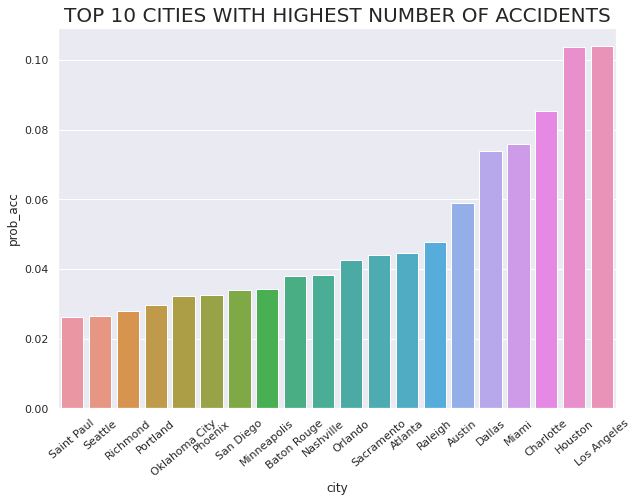

In [78]:
plt.figure(figsize=(10,7))
sns.barplot(x="city",y="prob_acc",data=top_cities)
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)

In [82]:
top_streets=df["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

Text(0.5, 1.0, 'TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ')

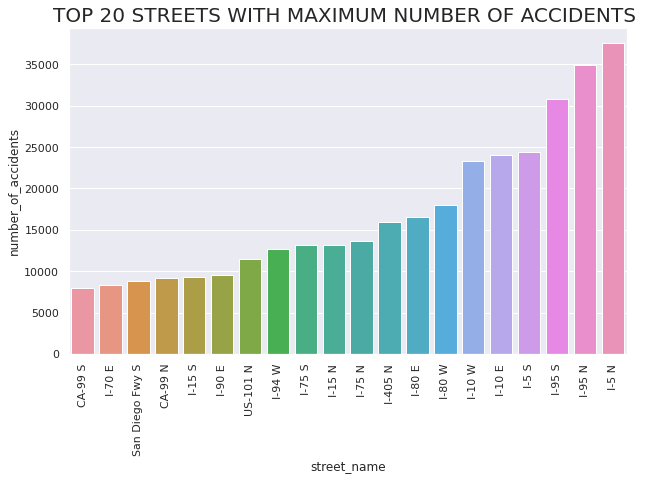

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20)